In [ ]:
!git clone https://github.com/bharat-b7/MultiGarmentNetwork.git
!wget https://datasets.d2.mpi-inf.mpg.de/MultiGarmentNetwork/Multi-Garmentdataset.zip
!unzip Multi-Garmentdataset.zip
!rm Multi-Garmentdataset.zip
!wget https://datasets.d2.mpi-inf.mpg.de/MultiGarmentNetwork/Multi-Garmentdataset_02.zip
!unzip Multi-Garmentdataset_02.zip
!rm Multi-Garmentdataset_02.zip
!gdown --id 1t4tvZCbRT37iBOpVCoOBHHQ4D6KsOAz3 -O MultiGarmentNetwork/assets/neutral_smpl.pkl
!git clone https://github.com/pmh47/dirt.git
!sed -i 's|set(CMAKE_CUDA_FLAGS "${CMAKE_CUDA_FLAGS} -arch=sm_30 --expt-relaxed-constexpr -DNDEBUG")|set(CMAKE_CUDA_FLAGS "${CMAKE_CUDA_FLAGS} -arch=sm_60 --expt-relaxed-constexpr -DNDEBUG")|' dirt/csrc/CMakeLists.txt
!(cd dirt && pip install .)
!git clone https://github.com/MPI-IS/mesh.git
# !sudo apt-get install libboost-dev # don't need on colab
!(cd mesh/ && BOOST_INCLUDE_DIRS=/usr/lib/x86_64-linux-gnu/ make all)
!wget https://datasets.d2.mpi-inf.mpg.de/MultiGarmentNetwork/weights.zip
!unzip weights.zip
!rm weights.zip
!mv Multi-Garment\ Network/test_data.pkl MultiGarmentNetwork/test_data.pkl
!mv Multi-Garment\ Network/saved_model/ MultiGarmentNetwork/saved_model/
!mv Multi-Garment\ Network/assets/* MultiGarmentNetwork/assets/
!rm -r Multi-Garment\ Network/
!sudo apt-get install -y xvfb
!sed -i "s|import cPickle as pkl|import _pickle as pkl|" MultiGarmentNetwork/visualize_scan.py
!sed -i "s|/BS/bharat/work/MGN_release/||" MultiGarmentNetwork/visualize_scan.py
!sed -i "s|scan.show()|scan.show().save_snapshot('scan.png', blocking=True)|" MultiGarmentNetwork/visualize_scan.py
!sed -i "s|scan2.show()|scan2.show().save_snapshot('scan2.png', blocking=True)|" MultiGarmentNetwork/visualize_scan.py

In [3]:
from IPython.display import Image

In [13]:
!xvfb-run -a python MultiGarmentNetwork/visualize_scan.py

Saving snapshot to scan.png, please wait...
Saving snapshot to scan2.png, please wait...
Done


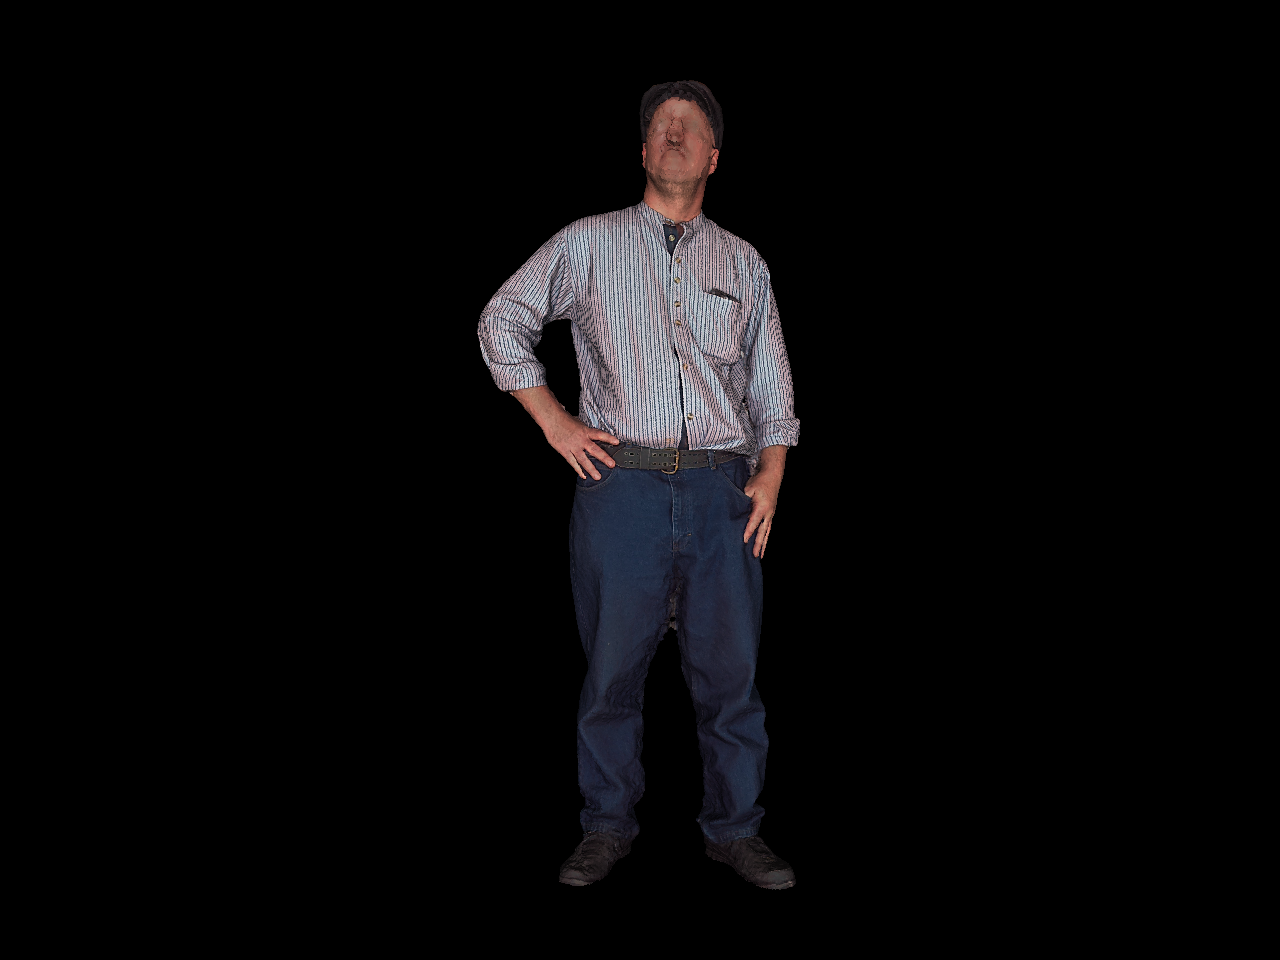

In [14]:
Image('scan.png')

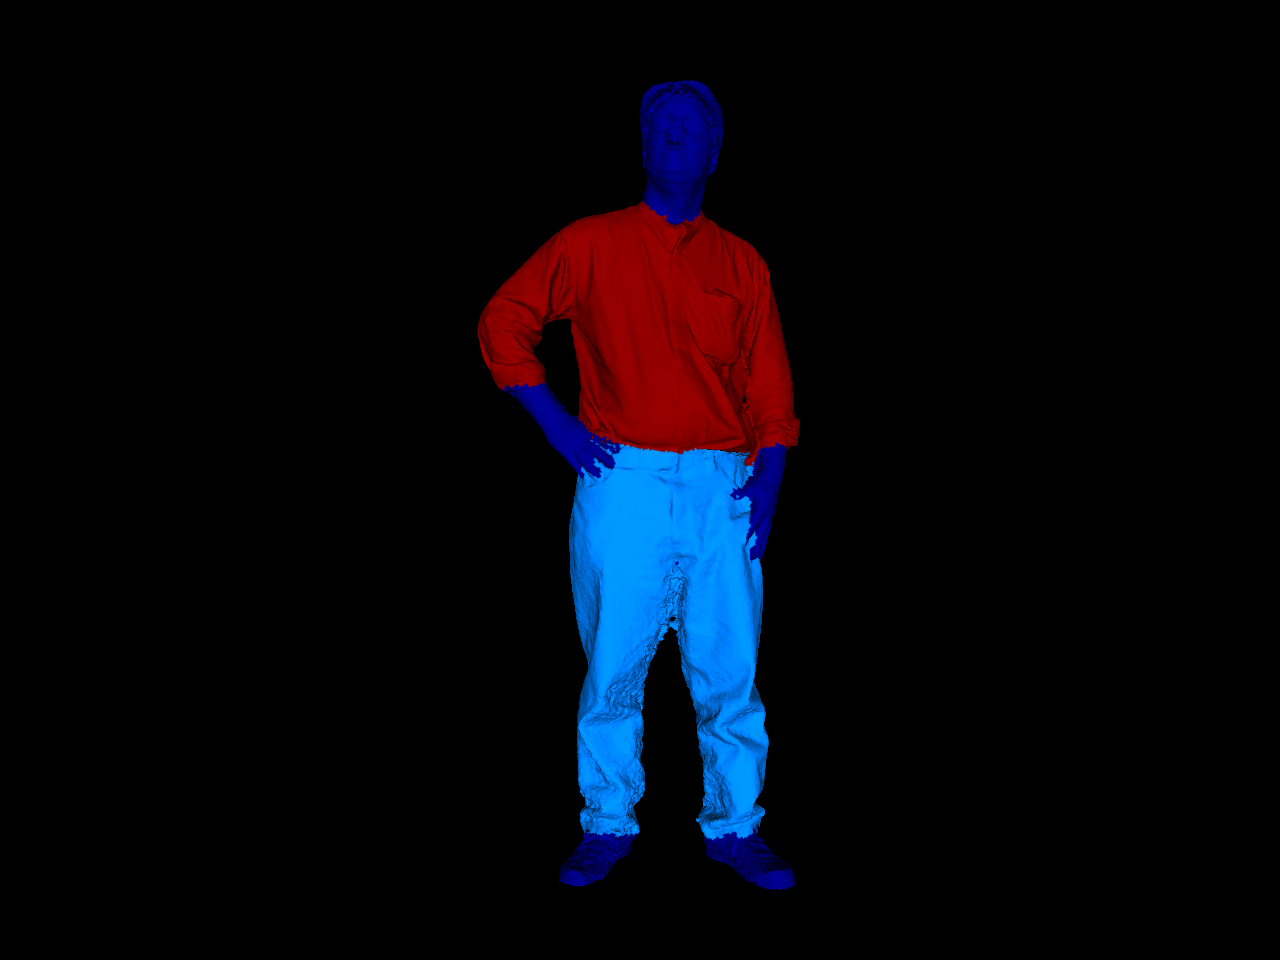

In [15]:
Image('scan2.png')

In [30]:
!find ./ -type f -name "*.py" -exec sed -i 's|import cPickle as pkl|import _pickle as pkl|' {} \;
!find ./ -type f -name "*.py" -exec sed -i 's|import cPickle as pickle|import _pickle as pickle|' {} \;

In [58]:
!apt-get install -qq libboost-dev xvfb libosmesa6-dev
!pip install chumpy opendr

  Using cached https://files.pythonhosted.org/packages/52/7e/937b09016c1b2c0f59629584429d3c63d2d50878464c5d3afd47444b7953/opendr-0.78.tar.gz
  Created wheel for opendr: filename=opendr-0.78-cp37-cp37m-linux_x86_64.whl size=553692 sha256=84a55213f21c9bd45a3d15de3b9348927fa1cfc0817fb1f7fcd0a6d89f8776e1
  Stored in directory: /root/.cache/pip/wheels/a4/bd/21/31caff756965d2a7dd55b7a696d82a9ecdf703ad5430078a15
Successfully built opendr


In [34]:
!find ./ -type f -name "*.py" -exec sed -i "s|from verts|from .verts|" {} \;
!find ./ -type f -name "*.py" -exec sed -i "s|^import lbs$|from . import lbs|" {} \;
!find ./ -type f -name "*.py" -exec sed -i "s|from posemapper|from .posemapper|" {} \;
!find ./ -type f -name "*.py" -exec sed -i "s|from serialization|from .serialization|" {} \;
!find ./ -type f -name "*.py" -exec sed -i "s|/BS/bharat/work/MGN_final_release/|MultiGarmentNetwork/|" {} \;
!find ./ -type f -name "*.py" -exec sed -i -r s/pkl\.load[\(]open[\(]\(.+\)[\)][\)]/pkl.load\(open\(\\1,\ \'rb\'\)\ ,\ encoding=\'latin1\'\)/g  {} \;
!find ./ -type f -name "*.py" -exec sed -i "s|/BS/RVH/work/data/smpl_models/neutral/basicModel_neutral_lbs_10_207_0_v1.0.0.pkl|MultiGarmentNetwork/assets/neutral_smpl.pkl|" {} \;
!find ./ -type f -name "*.py" -exec sed -i "s|/BS/bharat/work/MGN_release/||" {} \;

In [74]:
!sed -i "s|mvs\[0\]\[1\].set_static_meshes(\[garment_org_body\])|mvs\[0\]\[1\].set_static_meshes(\[garment_org_body\]); mvs\[0\]\[1\].save_snapshot('garment_org_body.png', blocking=True)|" MultiGarmentNetwork/visualize_garments.py
!sed -i "s|mvs\[0\]\[2\].set_static_meshes(\[garment_org_body, garment_posed\])|mvs\[0\]\[2\].set_static_meshes(\[garment_org_body, garment_posed\]); mvs\[0\]\[2\].save_snapshot('garment_org_body_garment_posed.png', blocking=True)|" MultiGarmentNetwork/visualize_garments.py
!sed -i "s|mvs\[0\]\[0\].set_static_meshes(\[garment_unposed\])|mvs\[0\]\[0\].set_static_meshes(\[garment_unposed\]); mvs\[0\]\[0\].save_snapshot('garment_unposed.png', blocking=True)|" MultiGarmentNetwork/visualize_garments.py

In [75]:
!xvfb-run -a python MultiGarmentNetwork/visualize_garments.py

Saving snapshot to garment_org_body.png, please wait...
Saving snapshot to garment_org_body_garment_posed.png, please wait...
Saving snapshot to garment_unposed.png, please wait...
Done


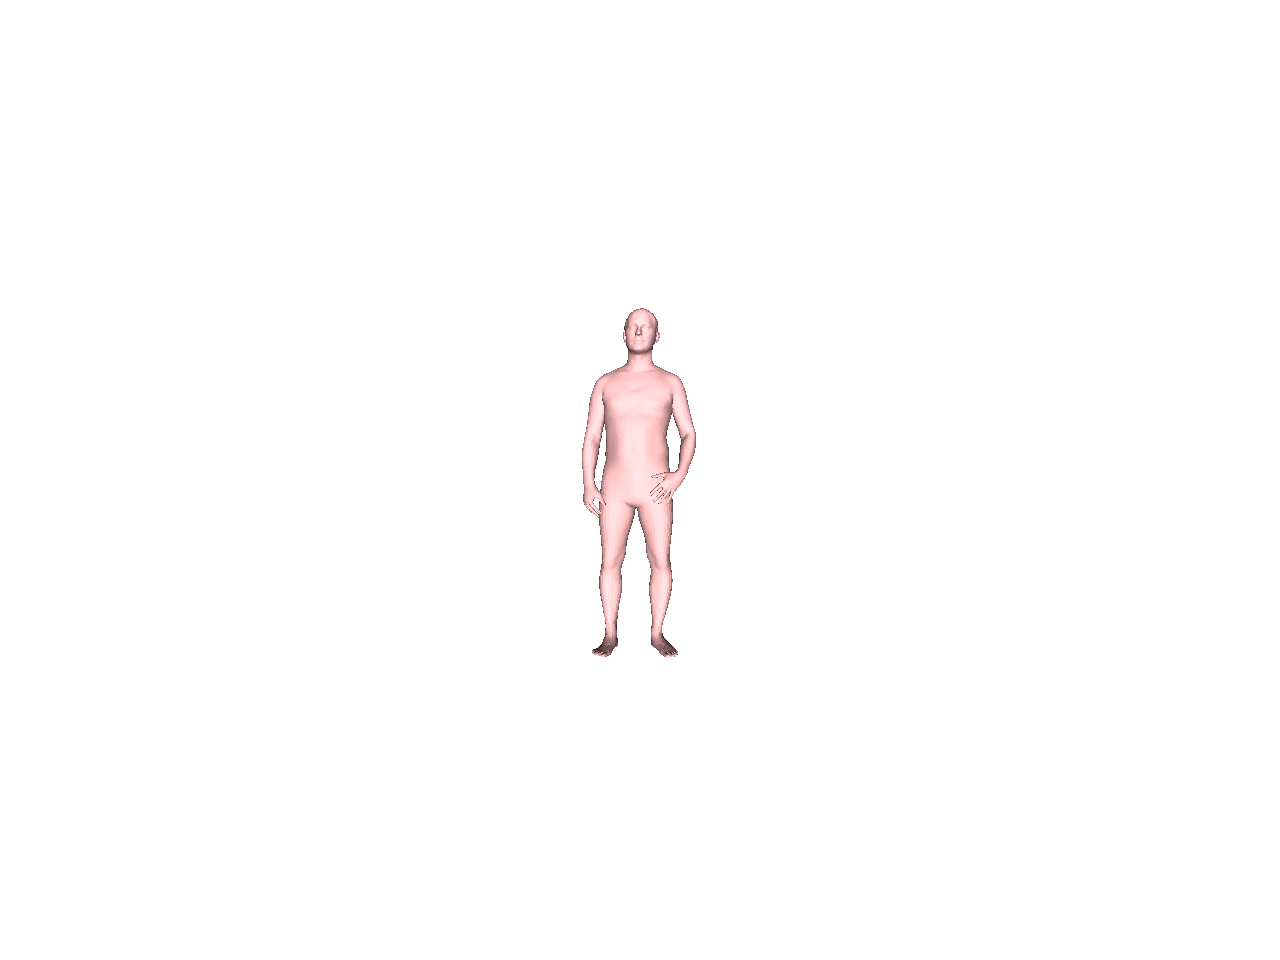

In [76]:
Image('garment_org_body.png')

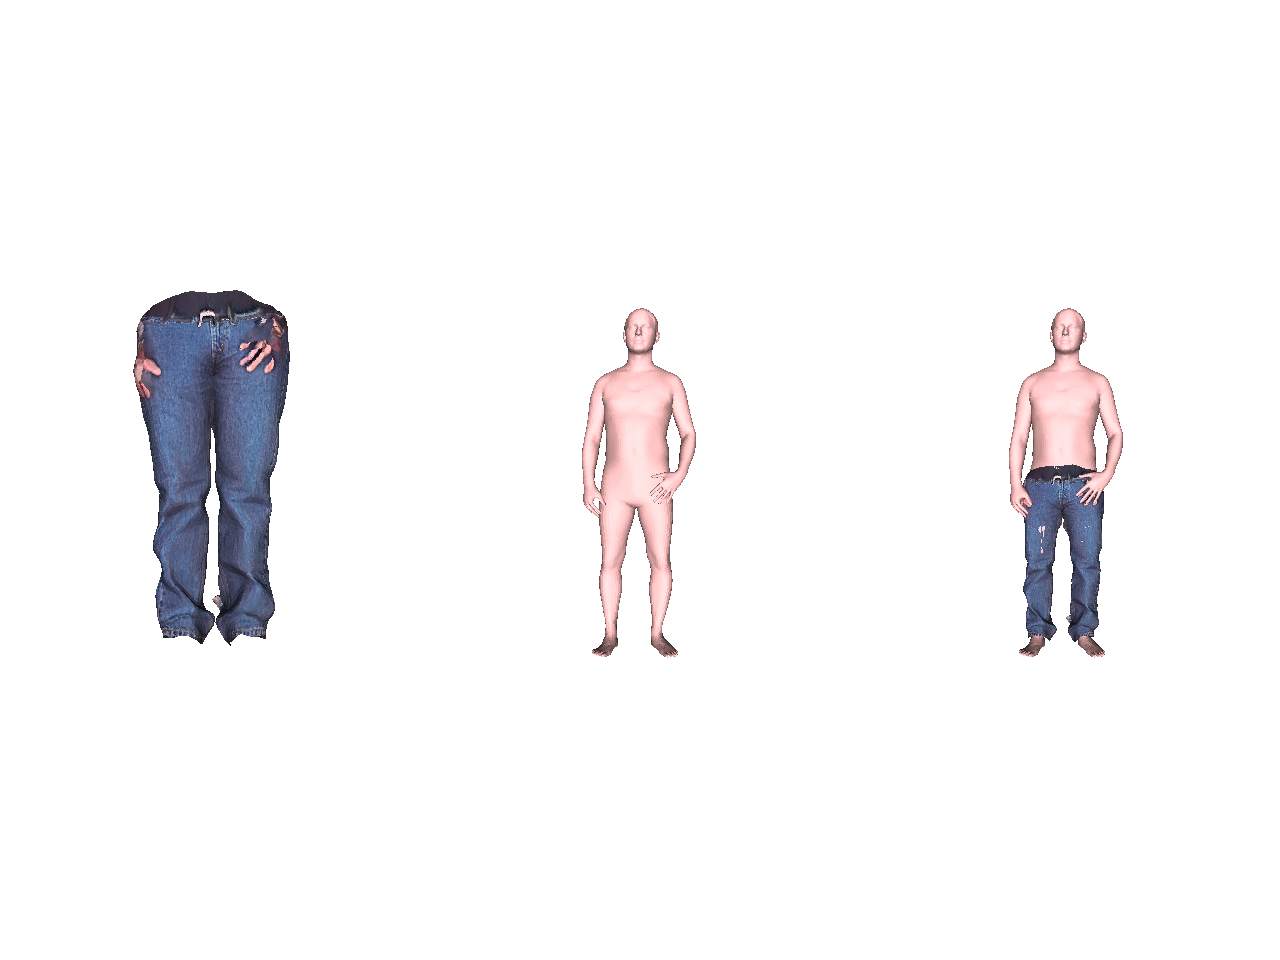

In [77]:
Image('garment_unposed.png')

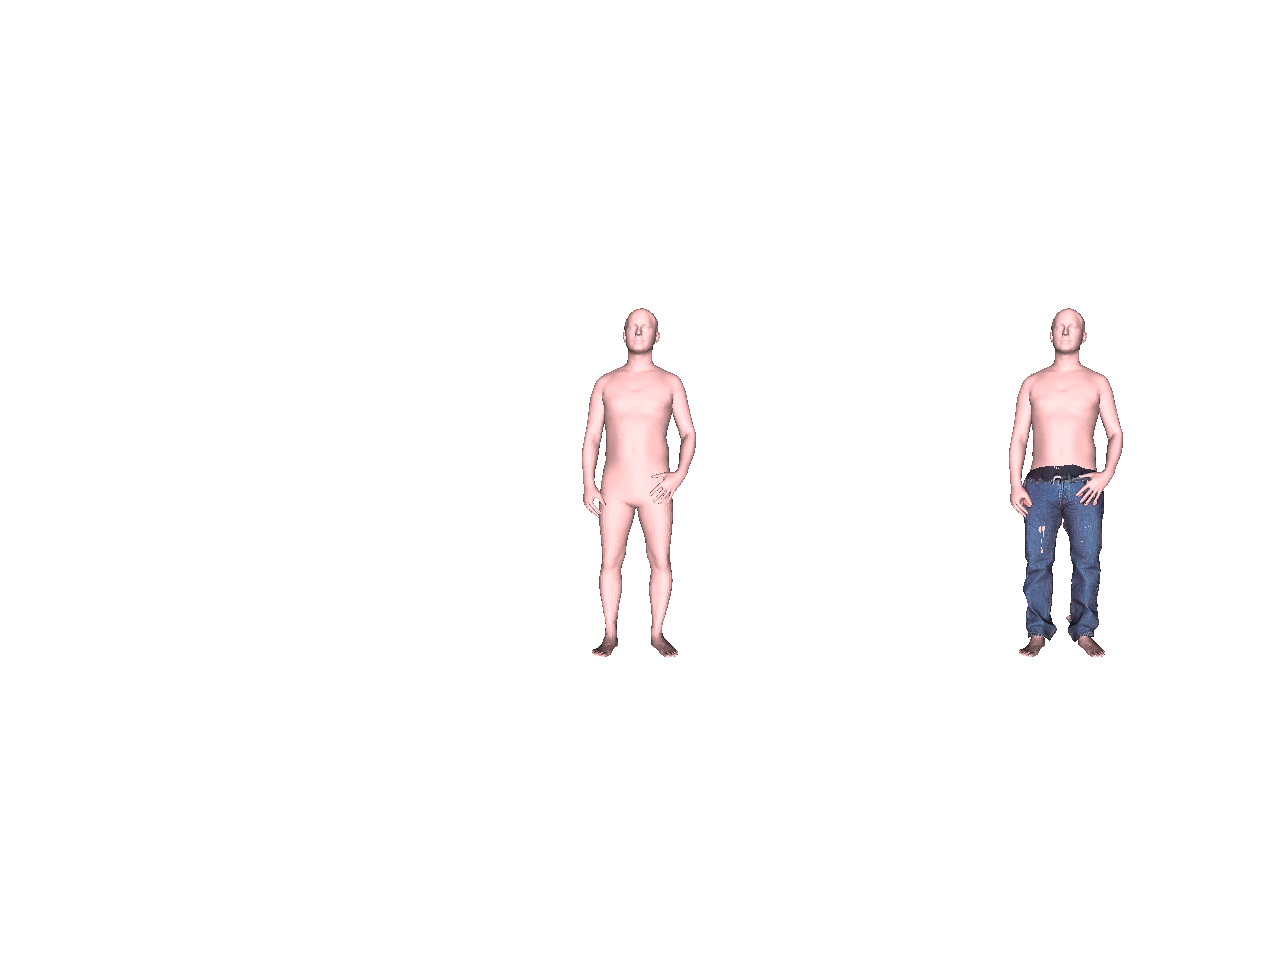

In [78]:
Image('garment_org_body_garment_posed.png')